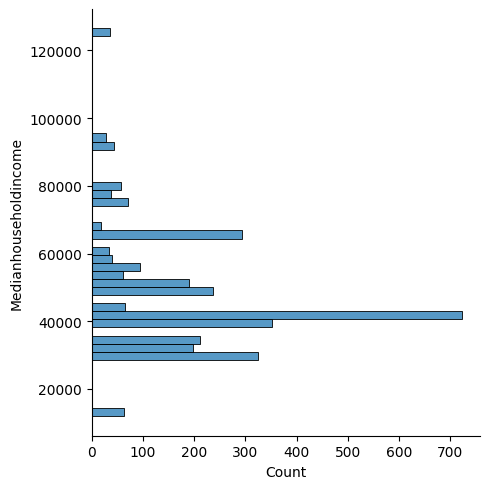

In [28]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("crime-housing-austin-2015.csv")

##Looks at data of income/homevalue of burglarized properties to see which are being targeted

pop = df[['Location','Medianhouseholdincome','Highest_Offense_Desc','Medianhomevalue','Report_Date','Zip_Code_Housing','Unemployment','Populationbelowpovertylevel']]

##only looking at ones we have the proper data for
pop = pop[pop.Highest_Offense_Desc == 'BURGLARY OF RESIDENCE']
pop = pop[pop.Medianhouseholdincome.isnull() != True]
pop = pop[pop.Medianhomevalue.isnull() != True]
##changes income to a interger value so that we can calculate things easier
pop['Medianhouseholdincome'] = pop['Medianhouseholdincome'].replace('[\$,]', '', regex=True).astype(int)

sns.displot(data = pop, y='Medianhouseholdincome')


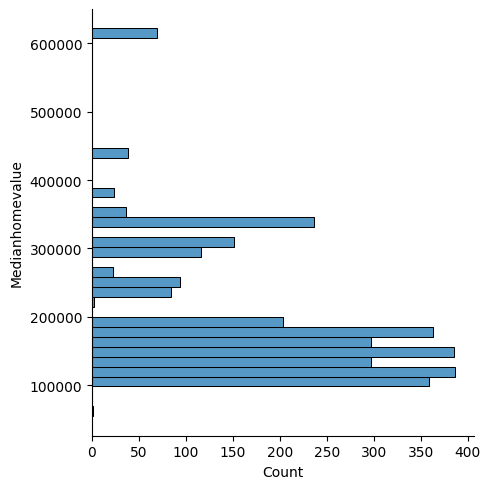

In [29]:
##Compares home values with the amont of crimes that have been committed so we can see that value of those homes that are targeted
pop['Medianhomevalue'] = pop['Medianhomevalue'].replace('[\$,]', '', regex=True).astype(int)
sns.displot(data = pop, y='Medianhomevalue')

([<matplotlib.patches.Wedge at 0x1b900168a90>,
 [Text(1.0496795927485147, 0.3288962641431373, 'Dec'),
  Text(0.6820528933643802, 0.8630201913357981, 'Apr'),
  Text(0.09375680434361339, 1.095997108408263, 'Jul'),
  Text(-0.5130532171568097, 0.9730243554839969, 'Jan'),
  Text(-0.9535362607536236, 0.5484237407589115, 'Aug'),
  Text(-1.099783385274246, -0.021829005353421596, 'May'),
  Text(-0.9486005025308635, -0.5569174863462212, 'Sep'),
  Text(-0.5634929605894249, -0.9447093115695245, 'Nov'),
  Text(-0.04146790415173068, -1.099218091611152, 'Feb'),
  Text(0.4779744585262449, -0.9907272162389318, 'Mar'),
  Text(0.8690768604395239, -0.6743184786497997, 'Oct'),
  Text(1.0738927939652867, -0.23823154087868018, 'Jun')],
 [Text(0.5725525051355534, 0.17939796225989305, '9.7%\n306'),
  Text(0.37202885092602556, 0.4707382861831625, '9.4%\n297'),
  Text(0.051140075096516385, 0.5978166045863251, '9.2%\n291'),
  Text(-0.27984720935825985, 0.5307405575367256, '9.0%\n284'),
  Text(-0.5201106876837946,

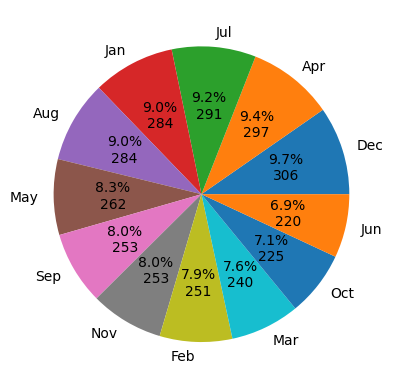

In [30]:

import matplotlib.pyplot as plt

##Which month contains the most/least crime?

## [0] -> Day [1] -> Month [2] -> Year
dates_expanded = pop['Report_Date'].str.split(pat = '-', expand = True)
pop[['Day','Month','Year']] = dates_expanded

## https://stackoverflow.com/questions/73616867/pie-chart-from-count-of-values-showing-the-percentage -- Found this here that helped a ton to make this
## If needed we can use this one, it's just much more boring
##sns.displot(data = pop, x='Month')
total = pop['Month'].value_counts().values.sum()
def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
plt.pie(pop['Month'].value_counts().values, labels=pop['Month'].value_counts().index, autopct=fmt)

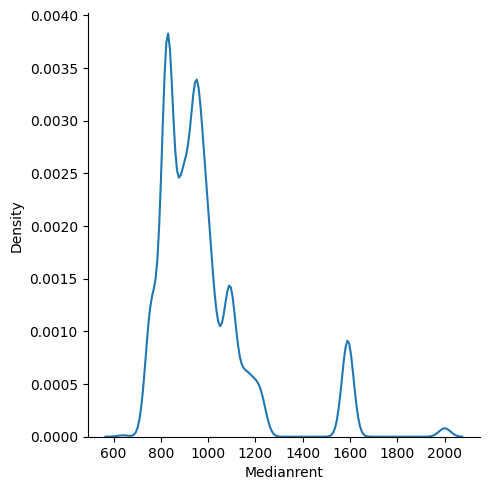

In [55]:
##checks all reported crime and medianrent to find a coorelation

df = pd.read_csv("crime-housing-austin-2015.csv")
##reset to look at all crime again
pop = df[['Location','Medianhouseholdincome','Highest_Offense_Desc','Medianhomevalue','Report_Date','Zip_Code_Housing','Unemployment','Medianrent']]

##properly format the medianrent value
pop = pop[pop.Medianrent.isnull() != True]
pop['Medianrent'] = pop['Medianrent'].replace('[\$,]', '', regex=True).astype(int)
sns.displot(data = pop, x='Medianrent',kind='kde')




In [56]:
##checks all reported crime and medianrent to find a coorelation

zipCodes = pd.read_csv("AustinZipCodes.csv")
pop = df[['Location','Medianhouseholdincome','Highest_Offense_Desc','Medianhomevalue','Report_Date','Zip_Code_Housing','Unemployment','Medianrent']]


zipCodes

,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
0,1,78705,"30.293474, -97.738268","Austin, Texas","26,825","11,008.66",#519
1,2,78751,"30.310819, -97.722821","Austin, Texas","14,005","5,822.28","#1,374"
2,3,78752,"30.331288, -97.704660","Austin, Texas","18,030","5,435.92","#1,528"
3,4,78741,"30.229845, -97.715136","Austin, Texas","40,661","5,346.47","#1,562"
4,5,78723,"30.305341, -97.683344","Austin, Texas","30,110","5,175.95","#1,640"
5,6,78704,"30.243128, -97.765874","Austin, Texas","43,249","5,001.96","#1,713"
6,7,78758,"30.387634, -97.705310","Austin, Texas","42,820","4,954.80","#1,730"
7,8,78702,"30.263909, -97.714495","Austin, Texas","22,534","4,501.98","#2,015"
8,9,78757,"30.351934, -97.732827","Austin, Texas","21,415","4,380.92","#2,087"
9,10,78756,"30.322200, -97.740236","Austin, Texas","7,128","4,298.80","#2,139"
